# Scikit learn (莫烦Python教程)

Cross-validation 交叉验证2 bili系列教程11 （overfitting问题）

In [6]:
import warnings
warnings.filterwarnings('ignore')

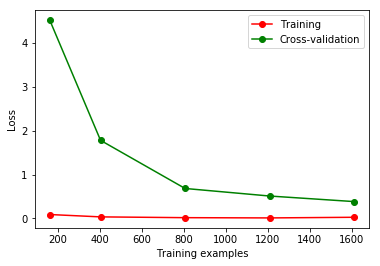

In [8]:
from sklearn.learning_curve import learning_curve #可视化学习过程
from sklearn.datasets import load_digits   #数字123的data
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

digits = load_digits()
X = digits.data
y = digits.target
train_sizes,train_loss,test_loss=learning_curve(
    SVC(gamma=0.001),X,y,cv=10,scoring='mean_squared_error',
    train_sizes=[0.1,0.25,0.5,0.75,1])
#cv分成10组交叉验证 训练的size五个点
train_loss_mean = -np.mean(train_loss,axis=1) #10个loss的平均值
test_loss_mean = -np.mean(test_loss,axis=1)

plt.plot(train_sizes,train_loss_mean,'o-',color="r",label="Training")
plt.plot(train_sizes,test_loss_mean,'o-',color="g",label="Cross-validation")
plt.xlabel("Training examples")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.show()

刚开始training的时候，test(绿色)data的误差比较大，越往后，训练的sample越多，test误差越小；而training data的误差一直都比较小。

以下是改变了gamma的值0.001变为0.01，test data的误差下不来了，因为发生了过拟合。

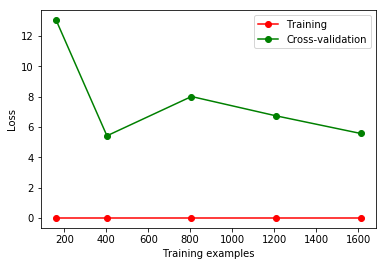

In [9]:
from sklearn.learning_curve import learning_curve #可视化学习过程
from sklearn.datasets import load_digits   #数字123的data
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

digits = load_digits()
X = digits.data
y = digits.target
train_sizes,train_loss,test_loss=learning_curve(
    SVC(gamma=0.01),X,y,cv=10,scoring='mean_squared_error',
    train_sizes=[0.1,0.25,0.5,0.75,1])
#cv分成10组交叉验证 训练的size五个点
train_loss_mean = -np.mean(train_loss,axis=1) #10个loss的平均值
test_loss_mean = -np.mean(test_loss,axis=1)

plt.plot(train_sizes,train_loss_mean,'o-',color="r",label="Training")
plt.plot(train_sizes,test_loss_mean,'o-',color="g",label="Cross-validation")
plt.xlabel("Training examples")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.show()

下一个讲解如何避免overfitting